# Inport Data and Modules

In [58]:
# Imports
import numpy as np
import pandas as pd

# Import train-test split function
from sklearn.model_selection import train_test_split

# Import the RandomForestClassifier and DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# Import Visualization Modules
import matplotlib.pyplot as plt
import plotly_express as px

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
mini = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")


# Base Attempt(Tree & Forest)

In [16]:
# Basic Hot encoding, data splitting, model training and testing

X = pd.get_dummies(df.drop("y", axis=1))
X
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

t_model = DecisionTreeClassifier(random_state=42)
f_model = RandomForestClassifier(random_state=42)

t_model.fit(X_train, y_train)
f_model.fit(X_train, y_train)

tree_predict = t_model.predict(X_test)
for_predict = f_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_predict)
for_acc = accuracy_score(y_test, for_predict)

display(tree_acc)
display(for_acc)

0.8404370110601564

0.8898030752630159

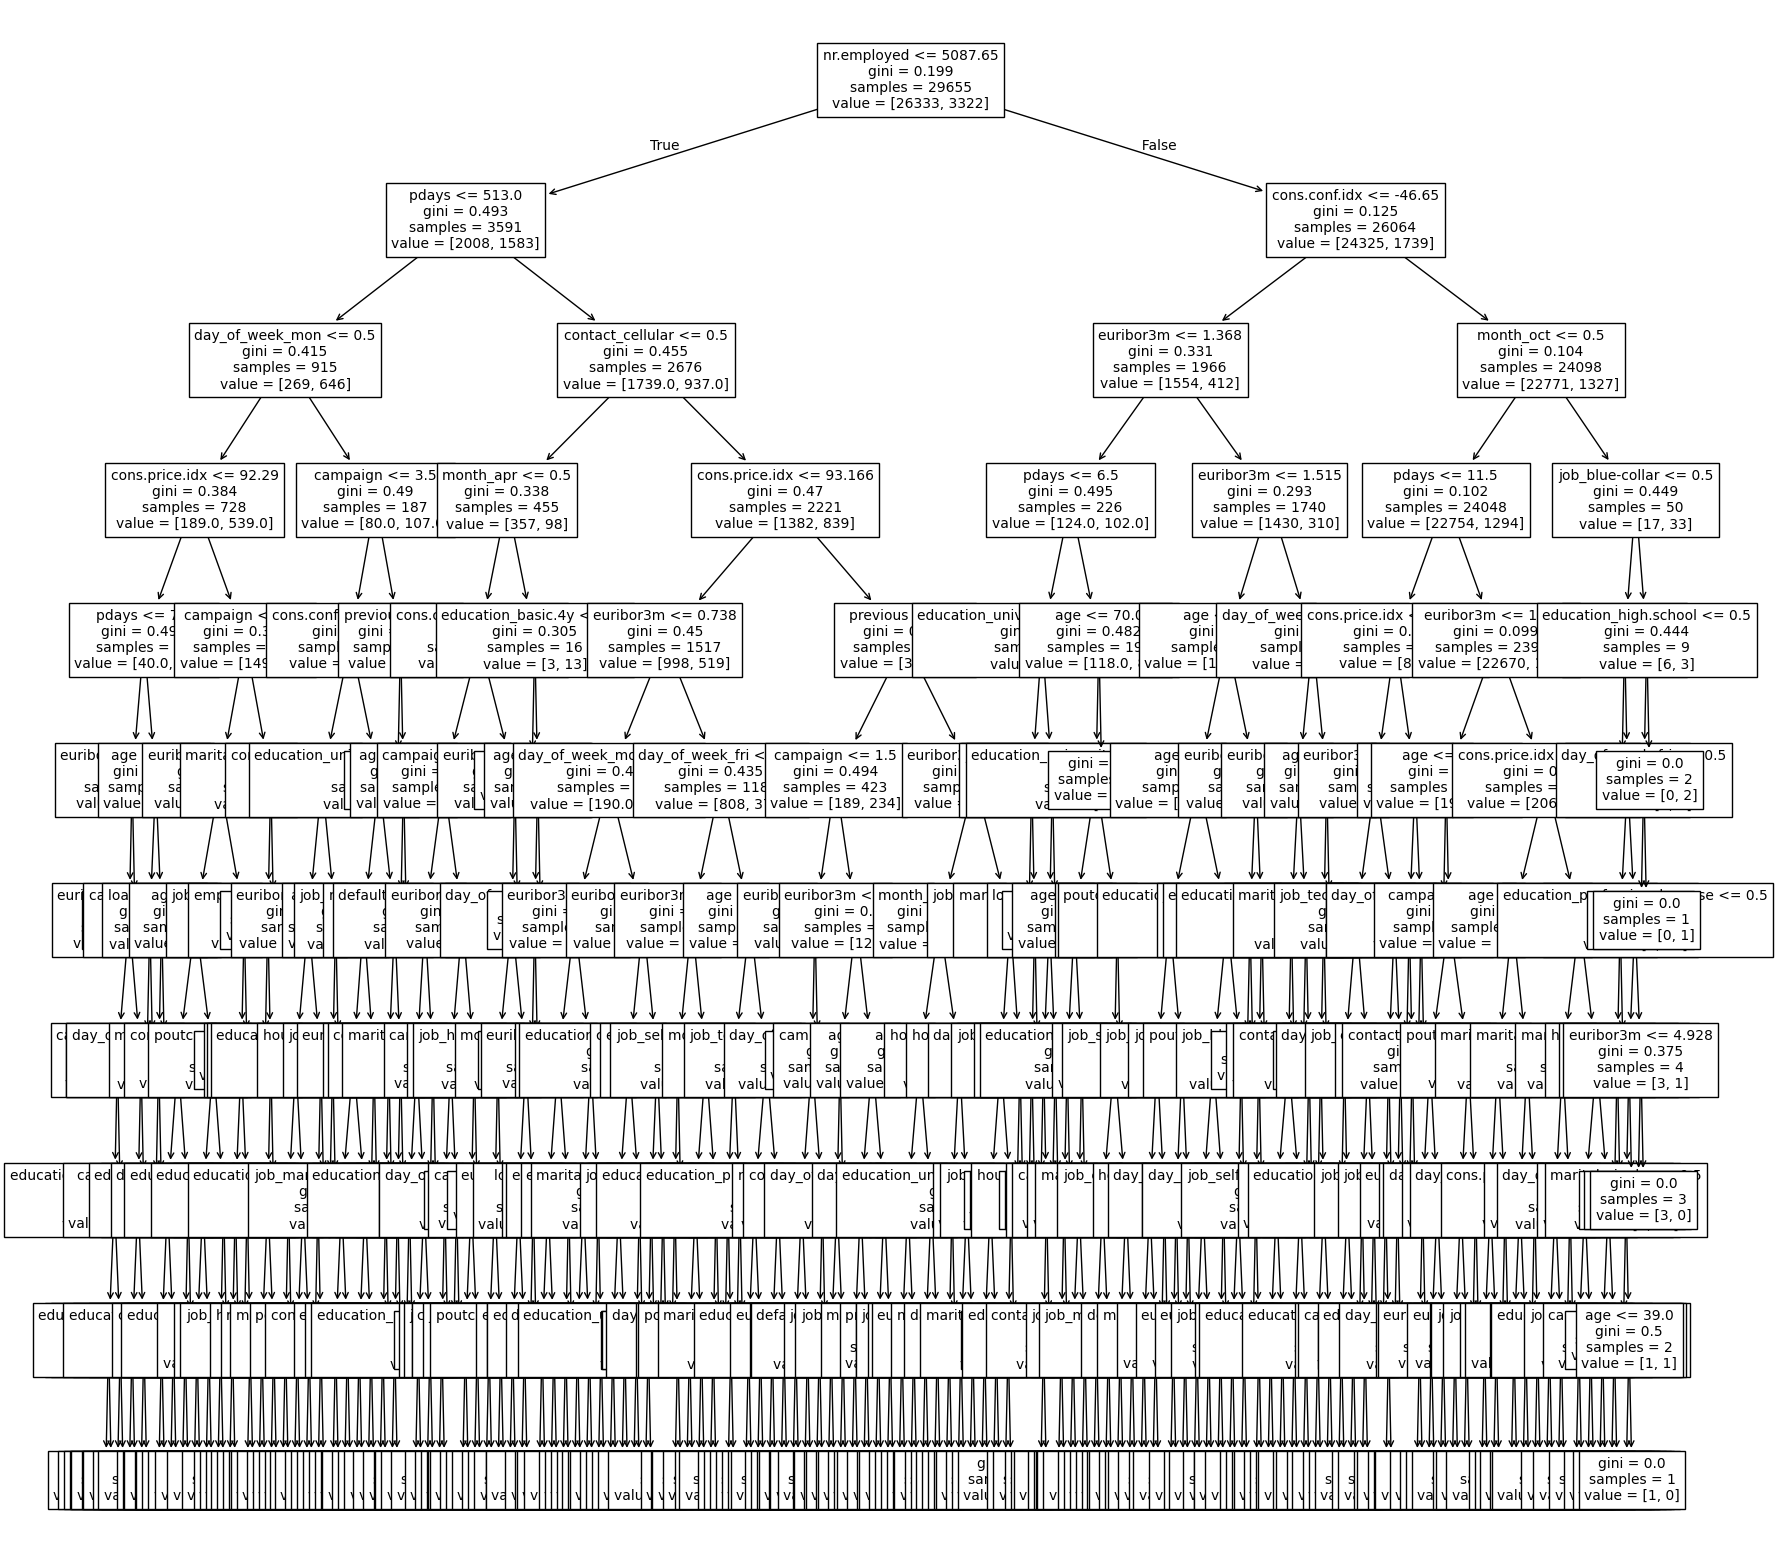

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(t_model, fontsize=10, feature_names=X.columns)
plt.show()

In [9]:
f_model.estimators_.count

<function list.count(value, /)>

# Cleaning

# 1st Tuned Parameters Attempt

For this attempt we will focus on tuning we will focus on 3 parameters:
* max_depth
    * Current State: Good. It seems that 10 is the best value.

* min_sample_split
    * Current State: Good. It seems that 225 is the best value.

* class_weights
    * Current State: Barely Started

I will be using three basic scores to evaluate this model setup:
* Accuracy
* Recall
* Precision

CURRENT RESULTS!!!
We SUCK. I don't have any of the data cleaned, and even fine tuning the parameters gives an accuracy of tops .8946. The issue comes from our *Recall*. Currently we are sitting at a whopping .2 or worse. That means that nearly 4 out of every 5 that should be predicted as a positive is being falsely labeled as a negative. :( gonna work on that next.

In [57]:
# this will be where I define the dict for the class weights. Interested in seeing
# if I can write some code that will test near all the possible weights and graph
# the results. (barely started)
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [64]:
# Basic Hot encoding, data splitting, model training and testing

X = pd.get_dummies(df.drop("y", axis=1))
X
y = df["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#parameters
md = 10
min_samp = 225
class_weight = {}

t_model = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=min_samp)
f_model = RandomForestClassifier(random_state=42,
    max_depth=17, 
    min_samples_split=min_samp,
    n_estimators=100)

t_model.fit(X_train, y_train)
f_model.fit(X_train, y_train)

tree_predict = t_model.predict(X_test)
for_predict = f_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_predict)
for_acc = accuracy_score(y_test, for_predict)
tree_recall = recall_score(y_test, tree_predict, pos_label='yes')
for_recall = recall_score(y_test, for_predict, pos_label='yes')
tree_pre = precision_score(y_test, tree_predict, pos_label='yes')
for_pre = precision_score(y_test, for_predict, pos_label='yes')


display(tree_acc)
display(for_acc)
display(tree_recall)
display(for_recall)
display(tree_pre)
display(for_pre)


0.8964121931480982

0.8947936336660373

0.28216704288939054

0.1986455981941309

0.6544502617801047

0.7154471544715447

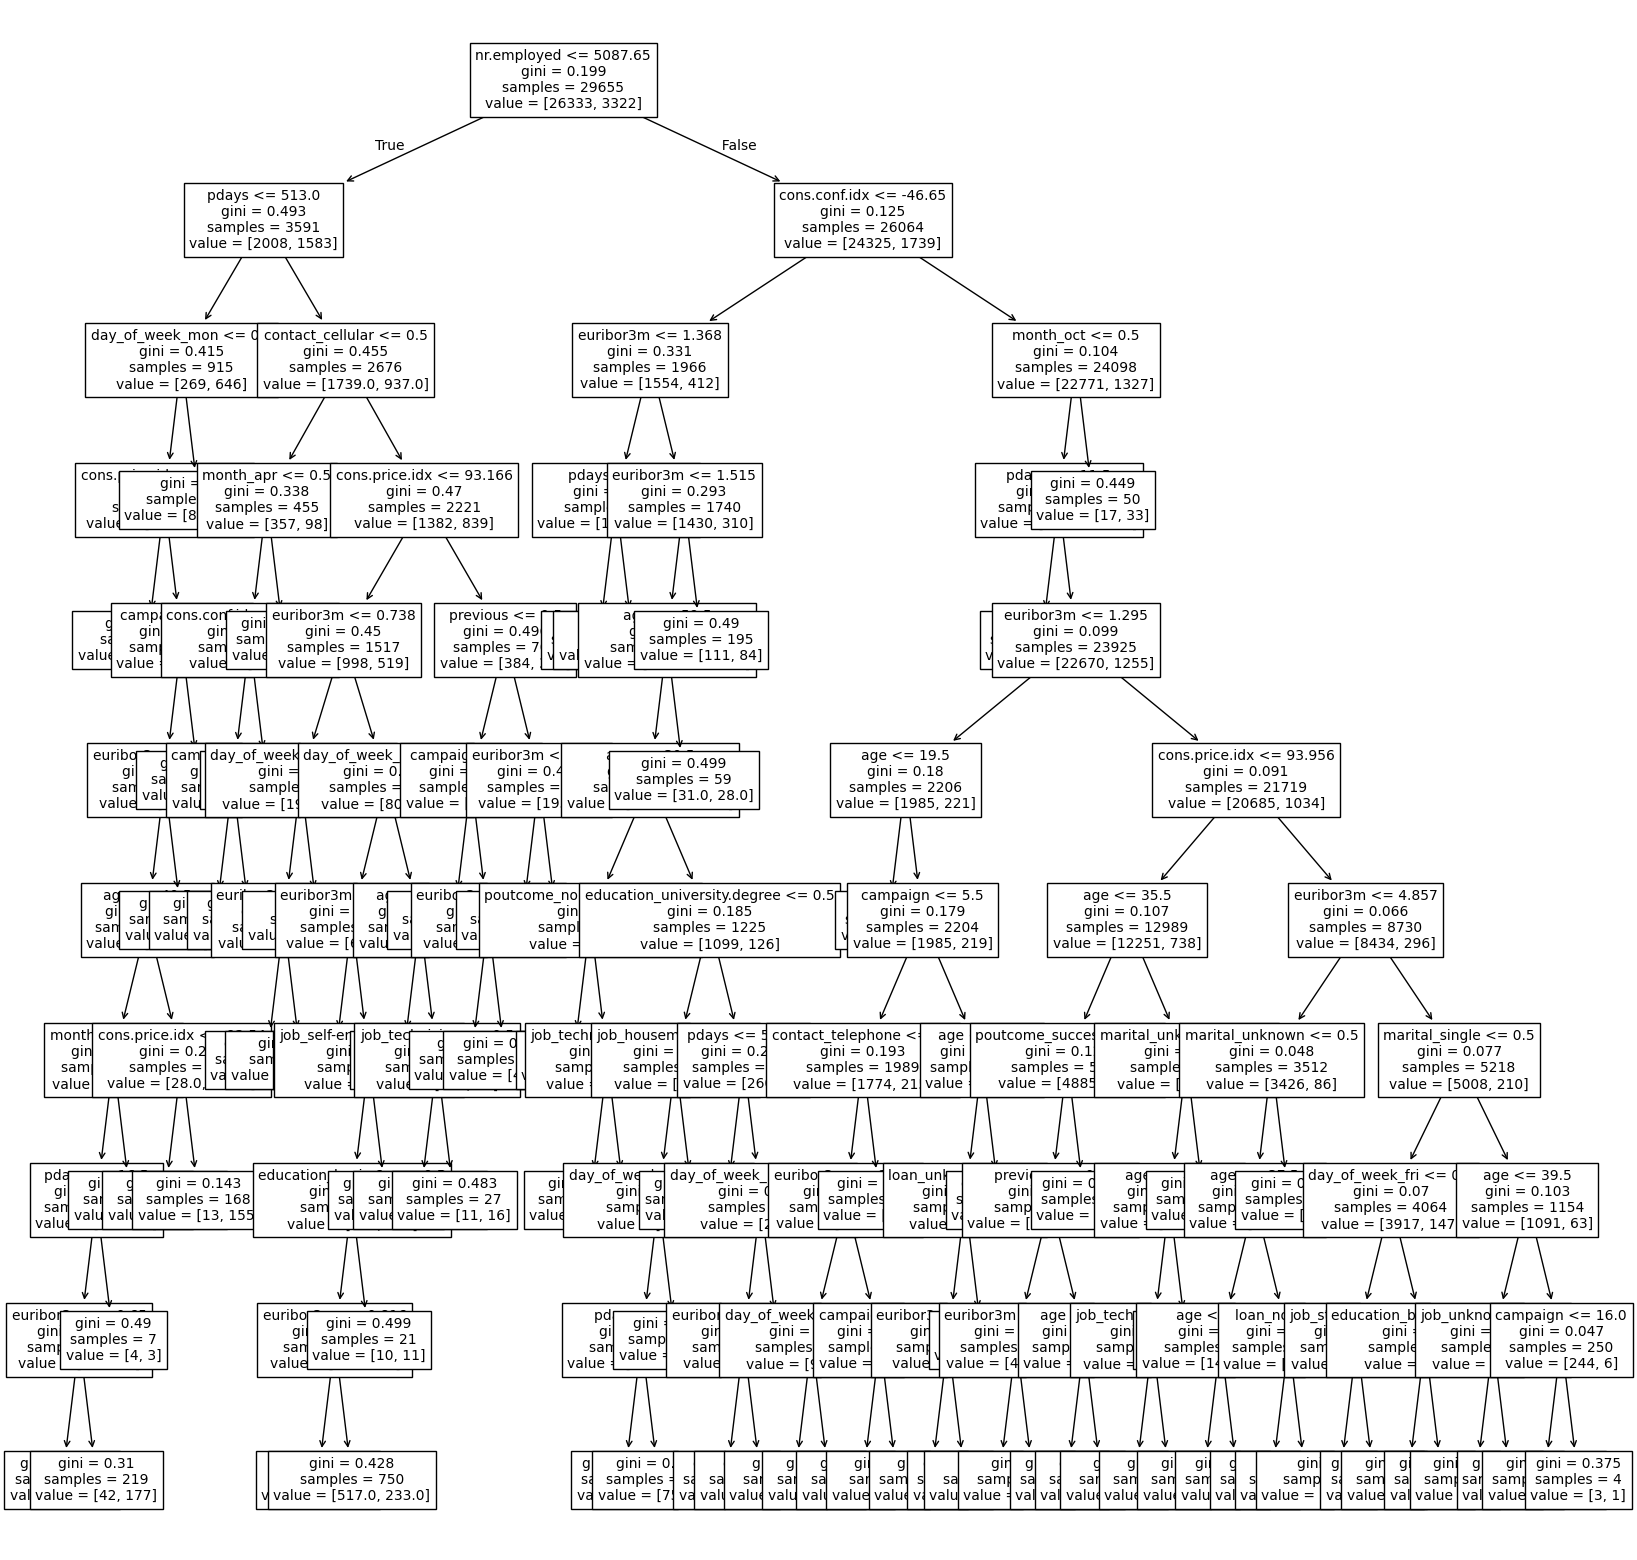

In [26]:
# Just printing out the tree cause it looks cool :)
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(t_model, fontsize=10, feature_names=X.columns)
plt.show()